In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
def calculate_weights(query_point, X, bandwidth):
    weights = np.exp(-np.sum((X - query_point)**2, axis=1) / (2 * (bandwidth**2)))
    return np.diag(weights)

def lwr_single_point(query_point, X, y, bandwidth):
    W = calculate_weights(query_point, X, bandwidth)
    model = LinearRegression()
    model.fit(X, y, sample_weight=W.diagonal())
    return model.predict(query_point.reshape(1, -1))

In [3]:
data = pd.read_csv(r'C:/users/prash/Downloads/10-dataset.csv')
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1].values

In [4]:
bandwidth = 1
x_range = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
predictions = [lwr_single_point(np.array([x]), X, y, bandwidth) for x in x_range.flatten()]

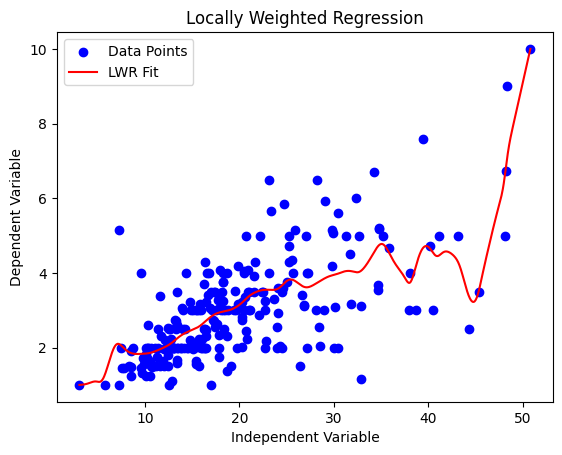

In [5]:
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(x_range, predictions, color='red', label='LWR Fit')
plt.title('Locally Weighted Regression')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.legend()
plt.show()